<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Huffman-Coding" data-toc-modified-id="Huffman-Coding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Huffman Coding</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Example</a></span><ul class="toc-item"><li><span><a href="#Reduction" data-toc-modified-id="Reduction-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reduction</a></span></li><li><span><a href="#Code-Assignment" data-toc-modified-id="Code-Assignment-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Code Assignment</a></span></li><li><span><a href="#Average-length" data-toc-modified-id="Average-length-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Average length</a></span></li></ul></li><li><span><a href="#Python-Implementation" data-toc-modified-id="Python-Implementation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Python Implementation</a></span><ul class="toc-item"><li><span><a href="#Get-size-of-image" data-toc-modified-id="Get-size-of-image-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Get size of image</a></span></li><li><span><a href="#Get-Probability" data-toc-modified-id="Get-Probability-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Get Probability</a></span></li><li><span><a href="#Code-Assigning" data-toc-modified-id="Code-Assigning-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Code Assigning</a></span></li></ul></li></ul></div>

## Huffman Coding
Huffman coding is a popular lossless Variable Length Coding (VLC), based on the following principles:
1. Shorter code words are assigned to more probable symbols and longer code words are assigned to less probable symbols. 
2. No code word of a symbol is a prefix of another code word. This makes Huffman coding uniquely decodable.
3. Every source symbol must have a unique code word assigned to it.

In image compression systems, Huffman coding is performed on the quantized symbols. The first step is to create a series of source reductions by ordering the probabilities of the symbols under consideration and combining the lowest probability symbols into a single symbol that replace them in the next source reduction. The second step in Huffman’s procedure is to code each reduced source, starting with the smallest source and working back to the original source. Huffman’s procedure creates the optimal code for a set of symbols. It is uniquely decodable, because any string of code symbols can be decoded in only one way.


## Example

### Reduction

Lets assume that we have a following image where the probability of occurance of each symbol is given.

|Symbol|Probability|
|-----|------|
|s1|0.4|
|s2|0.3|
|s3|0.1|
|s4|0.1|
|s5|0.07|
|s6|0.03|

* Now in the first step, we select two symbols which have lowest probability. It is `s5` and `s6`. Then sum them up. We will have new table as:

|symbol|probability|Reduction 1|
|-----|------|----|
|s1|0.4|0.4|
|s2|0.3|0.3|
|s3|0.1|0.1|
|s4|0.1|0.1|
|s5|0.07|0.1|
|s6|0.03|-|

* Now in the second step, we repeat same process.

|symbol|probability|Reduction 1|Reduction 2|
|-----|------|----|---|
|s1|0.4|0.4|0.4|
|s2|0.3|0.3|0.3|
|s3|0.1|0.1|0.1|
|s4|0.1|0.1|0.2|
|s5|0.07|0.1|-|
|s6|0.03|-|-|

* Similarly, at the end we will get reduction table as:

|symbol|probability|Reduction 1|Reduction 2|Reduction 3|Reduction 4|
|-----|------|----|---|--|--|
|s1|0.4|0.4|0.4|0.4|0.4|
|s2|0.3|0.3|0.3|0.3|0.6|
|s3|0.1|0.1|0.1|0.3|-|
|s4|0.1|0.1|0.2|-|-|
|s5|0.07|0.1|-|-|-|
|s6|0.03|-|-|-|-|

Now only two probability values are left so we stop the reduction here and start the code assignment.

### Code Assignment
Now we start from the final reduction table where only two values are left. We give different bit values to these two. 

* Give 0 to 0.6 and 1 to 0.4.

|symbol|probability|Reduction 1|Reduction 2|Reduction 3|Reduction 4|
|-----|------|----|---|--|--|
|s1|0.4|0.4|0.4|0.4|0.4 (1)|
|s2|0.3|0.3|0.3|0.3|0.6 (0)|
|s3|0.1|0.1|0.1|0.3|-|
|s4|0.1|0.1|0.2|-|-|
|s5|0.07|0.1|-|-|-|
|s6|0.03|-|-|-|-|

* Now our value 0.6 was derived from 0.3 and 0.3 from 3rd reduction step. Thus, we get to that step and give 0 and 1 to individual 0.3 and 0.3. Now our table will be like below.

|symbol|probability|Reduction 1|Reduction 2|Reduction 3|Reduction 4|
|-----|------|----|---|--|--|
|s1|0.4|0.4|0.4|0.4 (1)|0.4 (1)|
|s2|0.3|0.3|0.3|0.3 (00)|0.6 (0)|
|s3|0.1|0.1|0.1|0.3 (01)|-|
|s4|0.1|0.1|0.2|-|-|
|s5|0.07|0.1|-|-|-|
|s6|0.03|-|-|-|-|

In above table, we took the code 0 from 0.6 and put 0, 1 respectively to get code for 0.3 and 0.3.

* Again repeating above process,
|symbol|probability|Reduction 1|Reduction 2|Reduction 3|Reduction 4|
|-----|------|----|---|--|--|
|s1|0.4|0.4|0.4 (1)|0.4 (1)|0.4 (1)|
|s2|0.3|0.3|0.3 (00)|0.3 (00)|0.6 (0)|
|s3|0.1|0.1|0.1 (010)|0.3 (01)|-|
|s4|0.1|0.1|0.2 (011)|-|-|
|s5|0.07|0.1|-|-|-|
|s6|0.03|-|-|-|-|

The code value increases by going leftward everytime.

* Finally,

|symbol|probability| Code|Reduction 1|Reduction 2|Reduction 3|Reduction 4|
|-----|---|---|----|---|--|--|
|s1|0.4 |1|0.4 (1)|0.4 (1)|0.4 (1)|0.4 (1)|
|s2|0.3 |00|0.3 (00)|0.3 (00)|0.3 (00)|0.6 (0)|
|s3|0.1 |010|0.1 (010)|0.1 (010)|0.3 (01)|-|
|s4|0.1 |0110|0.1 (0110)|0.2 (011)|-|-|
|s5|0.07 |01110|0.1 (0111)|-|-|-|
|s6|0.03 |01111|-|-|-|-|

In above example, we have given a unique code for each value and it is clear that the vlaue with high probability have least length of code.

### Average length

$$
L(z) = \sum_{i=1}^{n}{L(a_i)P(a_i)}
$$
Where L is length of each code and P is a probability.

In our example,
$$
L = 1*0.4 + 2*0.3 + 3*0.1+4*0.1+5*0.07+5*0.03 =  2.2 bits/symbol
$$




**Coding Efficency**
$$
\nu = \frac{H(z)}{L(z)}
$$

Where, 
$$
H(z) = -\sum_{i=1}^{n}{P(a_i) * \log{P(a_i)}}
$$
It is also known as Information Entropy.

$$
H(z) = -(0.4 * log(0.4) + 0.3 * log(0.3) + 0.1 * log(0.1) + 0.1 * log(0.1) + 0.07 * log(0.07) + 0.03 * log(0.03)) = 1.8
$$

Now,
$$
\nu = \frac{1.8}{2.2} = 0.81
$$

Which means that our Huffman coding is 81% efficent.

## Python Implementation

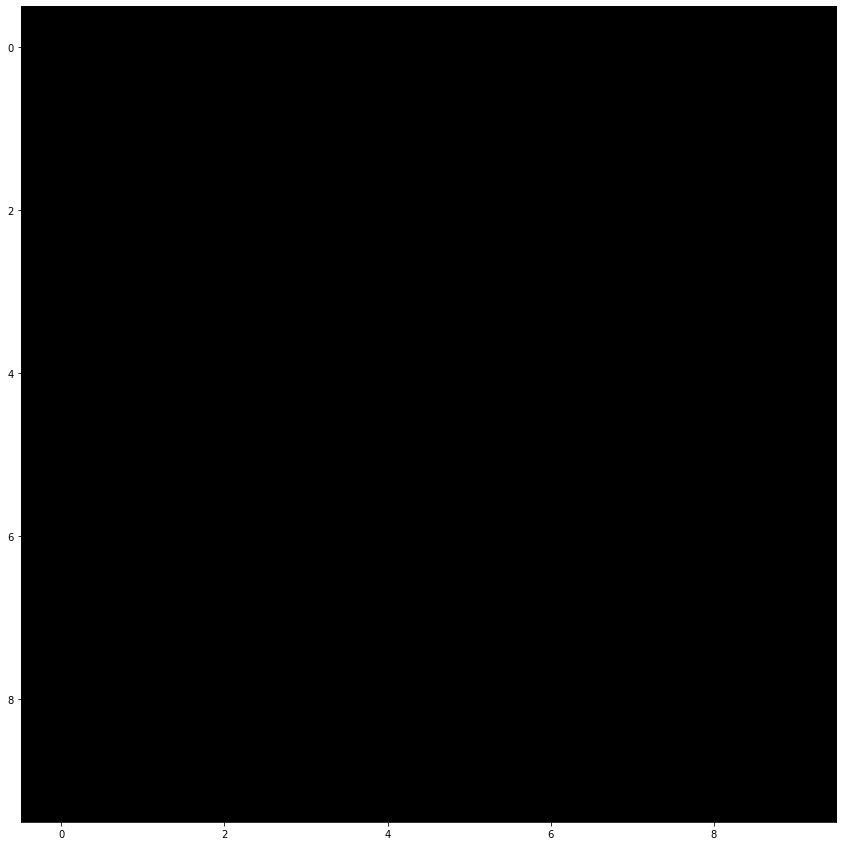

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys, os

def show(img, figsize=(15,15), title="Image"):
    fg = plt.figure(figsize=figsize)
    plt.imshow(img, vmin=0, vmax=255, cmap="gray")
    plt.show()
    
show(np.zeros((10,10)))

We will be using below image.

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Football_%28soccer_ball%29.svg/1200px-Football_%28soccer_ball%29.svg.png)
(From wikimedia)

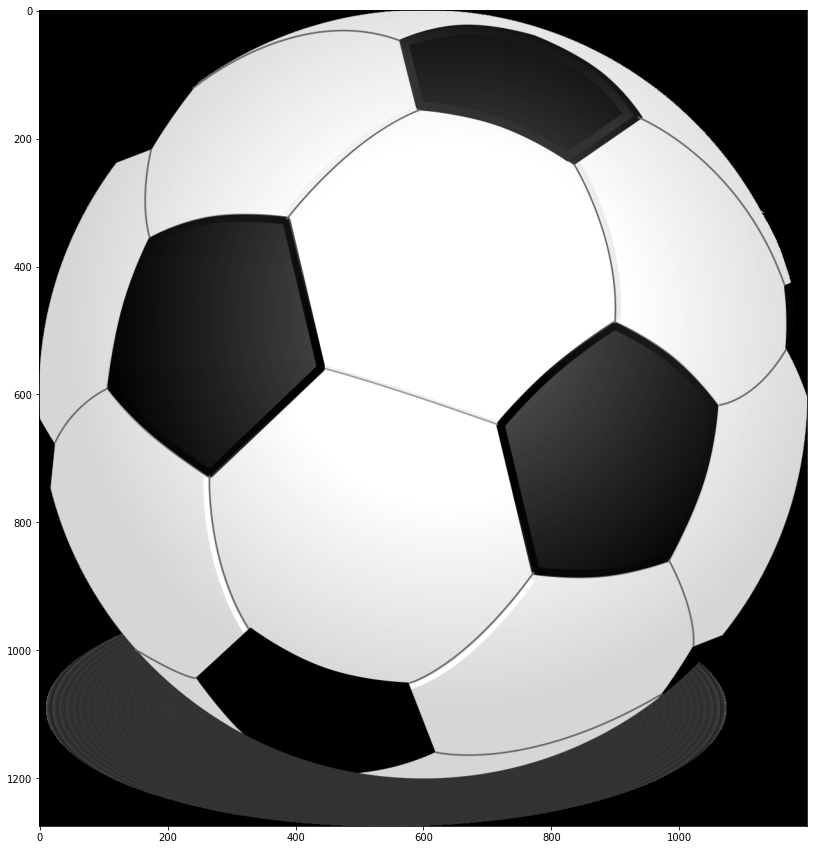

In [24]:
img = cv2.imread("football.png",0)
show(img)

### Get size of image

In [27]:
sys.getsizeof(img)/1024

1494.25

Above size is of img array after it has been read as a gray image.

In [30]:
def get_size(filename="football.png"):
    stat = os.stat(filename)
    size=stat.st_size
    return size

print(get_size())

230554


Above size is of our image has taken in filesystem.

### Get Probability

In [48]:
from collections import Counter


fimg = img.flatten().tolist()
pxs = len(fimg)
tbl = Counter(fimg)

ntbl = {k:v/pxs for k,v in tbl.items()}
ntbl = dict(sorted(ntbl.items(), key=lambda item: item[1]))
ntbl

{92: 2.156862745098039e-05,
 95: 2.2875816993464052e-05,
 74: 2.2875816993464052e-05,
 71: 2.3529411764705884e-05,
 86: 2.4183006535947712e-05,
 72: 2.4183006535947712e-05,
 90: 2.4836601307189544e-05,
 93: 2.4836601307189544e-05,
 101: 2.5490196078431373e-05,
 84: 2.5490196078431373e-05,
 79: 2.5490196078431373e-05,
 87: 2.5490196078431373e-05,
 78: 2.61437908496732e-05,
 100: 2.61437908496732e-05,
 97: 2.745098039215686e-05,
 75: 2.745098039215686e-05,
 76: 2.8104575163398693e-05,
 80: 2.8758169934640522e-05,
 98: 2.8758169934640522e-05,
 83: 2.8758169934640522e-05,
 99: 2.9411764705882354e-05,
 96: 2.9411764705882354e-05,
 94: 2.9411764705882354e-05,
 81: 2.9411764705882354e-05,
 89: 3.0718954248366014e-05,
 77: 3.137254901960784e-05,
 82: 3.202614379084967e-05,
 91: 3.3333333333333335e-05,
 88: 3.3333333333333335e-05,
 73: 4.052287581699346e-05,
 151: 4.901960784313725e-05,
 137: 5.032679738562092e-05,
 189: 5.032679738562092e-05,
 172: 5.0980392156862745e-05,
 122: 5.0980392156862

In above code, we have flattened our image to get a 1d vector then we counted the number of times it has occured. Then calculated the probability of occurence. And sorted it.

### Code Assigning
